### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [17]:
library(cluster)
library(ggplot2)

datos <-read.table("/home/mauricio/Escritorio/INFO267-master/milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

<Ejercicio 1: describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

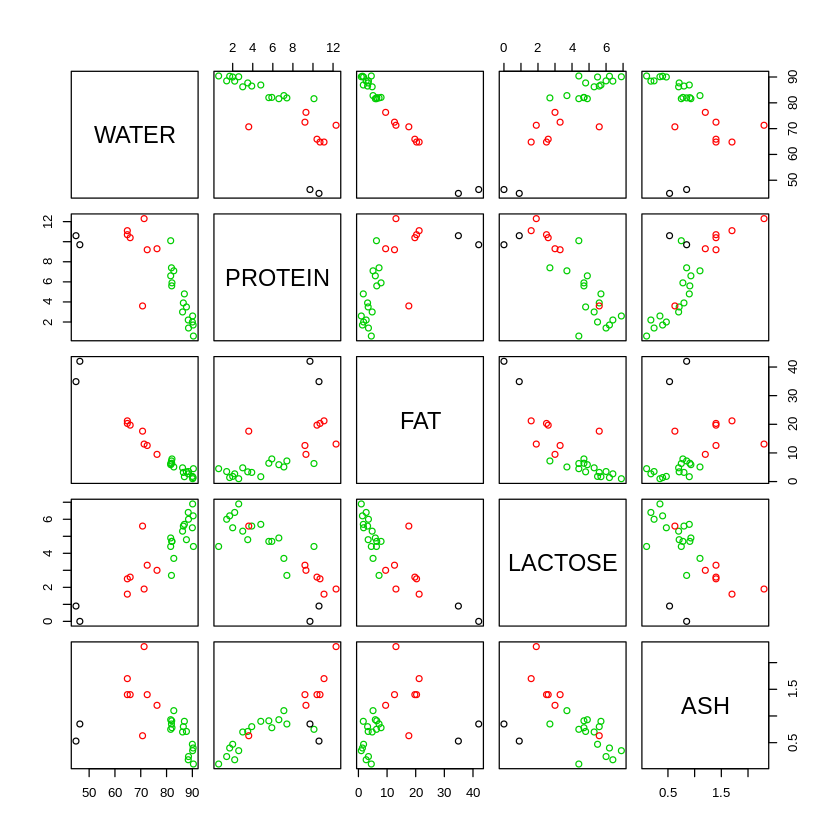

In [18]:

k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)


**R:**<br>Los datos describen leches de distintas especies de animales, con valores de porcentaje de agua, proteinas, grasa, lactosa y ceniza (minerales).<br>
Es importante poder clasificar los datos y agrupar los que tengan caracteristicas similares ya que en un comienzo no tenemos certeza de las categorìas en las que serán clasificados y es de mucha ayuda utilizar este medodo de aprendizaje no supervisado para determinarlo. 



Ejercicio 2: Interprete y comente los resultados obtenidos. 

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957
2,-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
3,1.243827,0.0248324,0.07949783,-0.02299768,0.004865841


K-means clustering with 3 clusters of sizes 2, 7, 16

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 45.65000 10.150000 38.45000 0.450000 0.690000
2 69.47143  9.514286 16.28571 2.928571 1.432857
3 86.06250  4.275000  4.17500 5.118750 0.635625

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         3          3          3          3          3          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          3          3          3          3          3          3 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          1          1 

Within cluster sum of squares by cluster:
[1]  27.1912 299.9911 377.2215
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

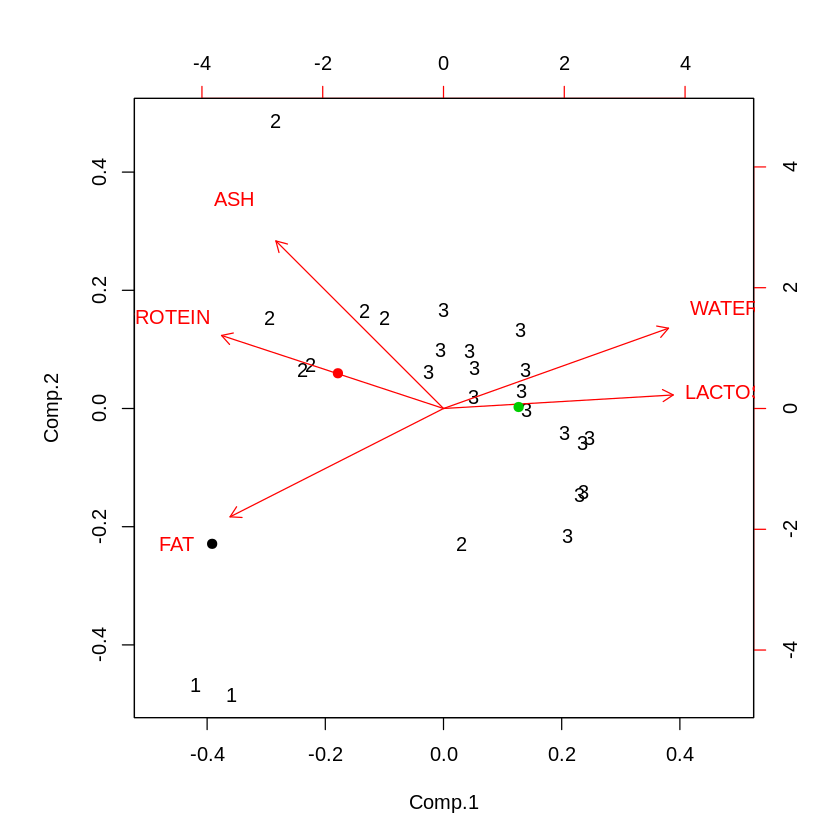

In [19]:

res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


**R:**<br>Se han clasificado los datos, obteniendo tres grupos o clústers.<br>
- Grupo1: Tienen mucho porcentaje de grasa.
- Grupo2: Tienen mas porcentaje de lactosa y agua. 
- Grupo3: Son los que contienen más porcentaje de proteínas y ceniza(minerales).


Ejercicio 3: Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-2.364801,-0.14031964,-0.20043965,0.06719411,-0.0017996632
2,1.112848,0.06603277,0.09432454,-0.03162076,0.0008469003


K-means clustering with 2 clusters of sizes 8, 17

Cluster means:
     WATER  PROTEIN       FAT  LACTOSE       ASH
1 62.66250 9.700000 22.675000 2.300000 1.2762500
2 85.48824 4.570588  4.488235 4.994118 0.6688235

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          2          2          2          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          2          2          1          1          1          1 
  REINDEER      WHALE       SEAL    DOLPHIN 
         1          1          1          1 

Within cluster sum of squares by cluster:
[1] 1664.9235  521.8994
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] 

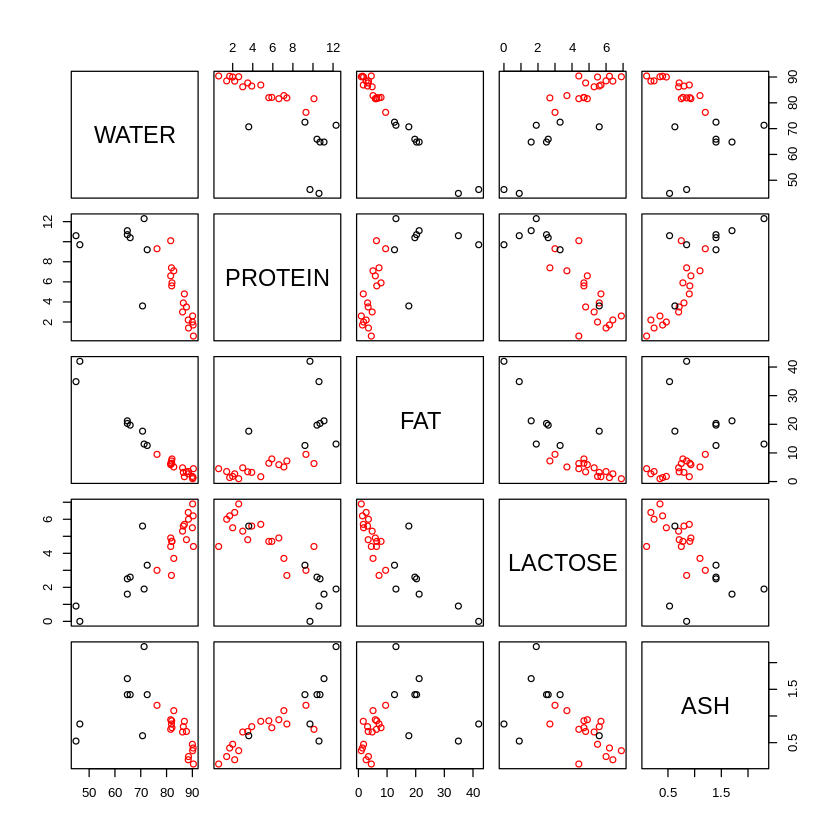

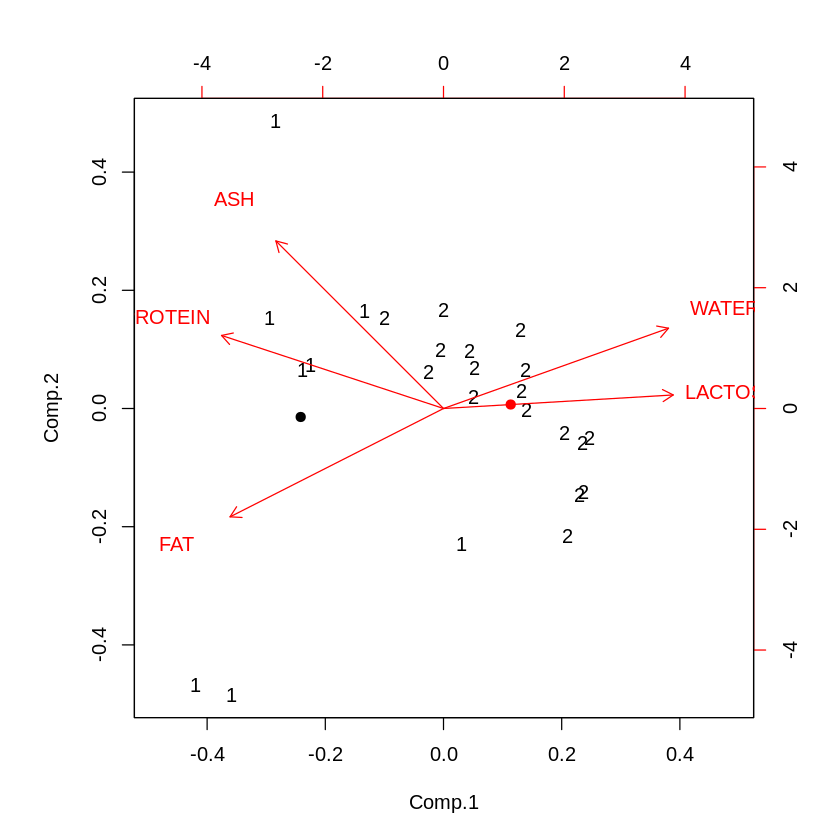

In [20]:
k0=2
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

Se crean dos grupos o clusters:<br>
Grupo1- Ceniza(minerales), proteina y grasa<br>
Grupo2- Agua Lactosa<br>



,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,0.02253818,0.4485425,0.240092595,-0.21444910,0.006758595
2,-3.83108138,-2.2408320,0.097900012,-0.02910750,-0.029457957
3,-1.87604083,0.5598512,-0.299886203,0.09929465,0.007419768
4,1.87606405,-0.2017241,-0.007713097,0.09635908,-0.003291286


K-means clustering with 4 clusters of sizes 7, 2, 6, 10

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE       ASH
1 81.18571  7.428571  6.90000 4.014286 0.9314286
2 45.65000 10.150000 38.45000 0.450000 0.6900000
3 68.33333  9.550000 17.41667 2.916667 1.4716667
4 88.50000  2.570000  2.80000 5.680000 0.4850000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         4          4          4          4          4          4          4 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          4          4          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         4          1          1          3          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          2          2 

Within cluster sum of squares by cluster:
[1]  63.53491  27.19120 191.74708  59.41225
 (between_SS / tot

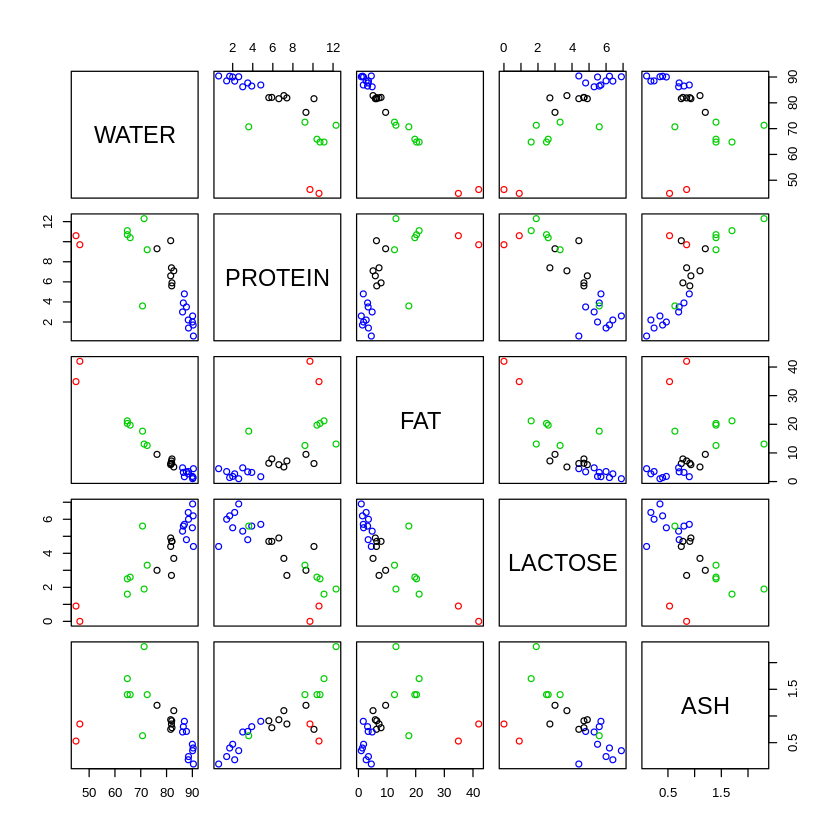

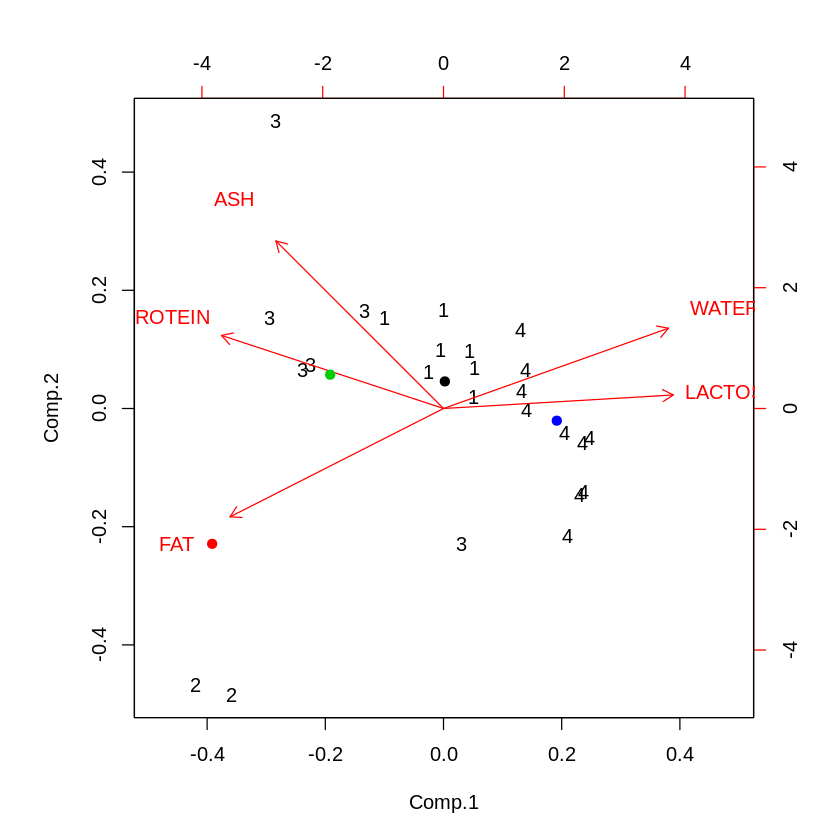

In [21]:
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

Se crean dos grupos o clusters:<br>
Grupo1- Grasa<br>
Grupo2- Proteínas y ceniza<br>
Grupo3- Agua y lactosa<br>
Grupo4- Agua, lactosa y minerales<br>

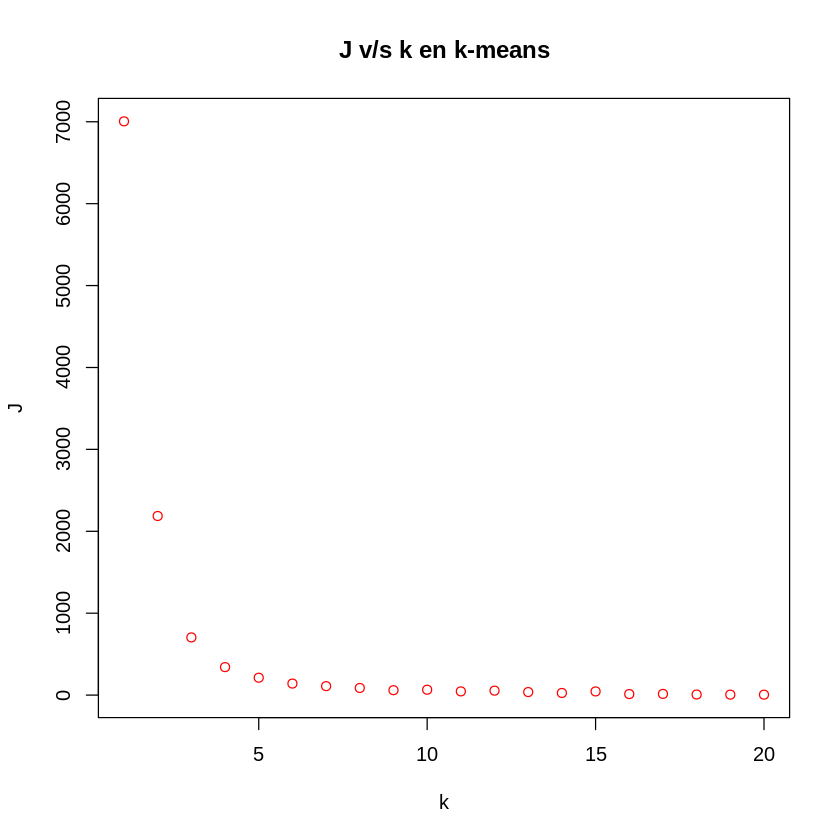

In [22]:


J<-rep(0,20)
fin_iter<-20

max_k=15 
tolerancia=2 

min_p<-0
for (k in 1:fin_iter){
    cl<-kmeans(datos,k,iter.max=1000,nstart=10)
    J[k]<-cl$tot.withinss
    if(k == 2){
        p <- abs(J[k-1] - J[k])
#        
        min_p<-p
    }
    else if(k>2){
        p <- abs( J[k-1] - J[k] )
        if(p < min_p && k < max_k && p <=tolerancia){
            min_p<-p
            best_k <- k
        }
    }
    
     
}



plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

Ejercicio 4: de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?
Agregue código para automatizar este criterio.

El que presente una menor pendiente, considerando alguna tolerancia especificada.

In [23]:
print("mejor_k")
print(best_k)

[1] "mejor_k"


ERROR: Error in print(best_k): objeto 'best_k' no encontrado


Ejercicio 5: Realice un análisis de clustering con el conjunto de datos DatosUsoFacebook.csv
Interprete sus resultados.

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16
1,-2.0830069,0.5876838,-0.1277608,0.22748401,0.04844887,0.13239516,-0.1608245,0.089489515,0.13683867,0.12100099,0.10295905,-0.11720367,-0.16020492,0.011770480,-0.07197697,-0.06113097
2,-0.2321171,-1.2068088,-0.4539833,-0.24678735,-0.29323432,-0.19231675,0.4391210,0.006548467,-0.02080341,0.05424554,-0.06905690,0.08602444,0.02701721,-0.080276779,0.10125849,-0.07075686
3,1.3897098,1.2344818,0.5961507,0.06507169,-0.99596293,0.22469748,0.4890922,0.088937756,0.17854788,-0.06492444,-0.16240107,-0.08073686,-0.35204969,-0.001709759,0.13691482,-0.06523796
4,2.0994209,0.2166317,-1.3675379,-0.14027722,0.58880828,0.07688106,-0.3721754,-0.304283920,-0.03538516,0.29098038,0.22014829,0.29158522,0.15402808,0.137549966,-0.11968366,0.01816591
5,0.3404923,-0.1288364,1.0841300,0.09450529,0.64111046,-0.10600547,-0.4790767,0.013355973,-0.22270312,-0.32199915,-0.04423615,-0.09467497,0.28924082,0.005917363,-0.06968647,0.18581186


K-means clustering with 5 clusters of sizes 44, 50, 28, 24, 41

Cluster means:
        R1       R2       R3       R4       R5       R6       R7       R8
1 2.840909 2.909091 2.909091 2.272727 1.659091 1.772727 2.750000 2.931818
2 3.040000 2.880000 2.660000 2.480000 1.260000 1.780000 2.360000 3.000000
3 2.071429 1.857143 1.964286 2.142857 1.142857 3.035714 2.642857 2.214286
4 2.250000 2.375000 1.500000 1.666667 1.000000 1.250000 1.541667 1.750000
5 2.170732 2.585366 2.902439 2.414634 1.463415 1.707317 2.292683 2.707317
        R9      R10      R11      R12      R13      R14      R15      R16
1 1.795455 1.977273 2.818182 2.522727 2.840909 1.659091 2.272727 1.818182
2 1.280000 1.920000 3.060000 1.440000 1.640000 1.160000 1.800000 1.260000
3 1.321429 2.250000 3.607143 1.750000 2.571429 1.357143 1.285714 1.214286
4 1.250000 2.041667 3.666667 1.541667 1.916667 1.083333 1.416667 1.000000
5 1.195122 1.731707 3.609756 1.390244 3.341463 1.317073 1.487805 1.146341

Clustering vector:
  [1] 3 4 3 5

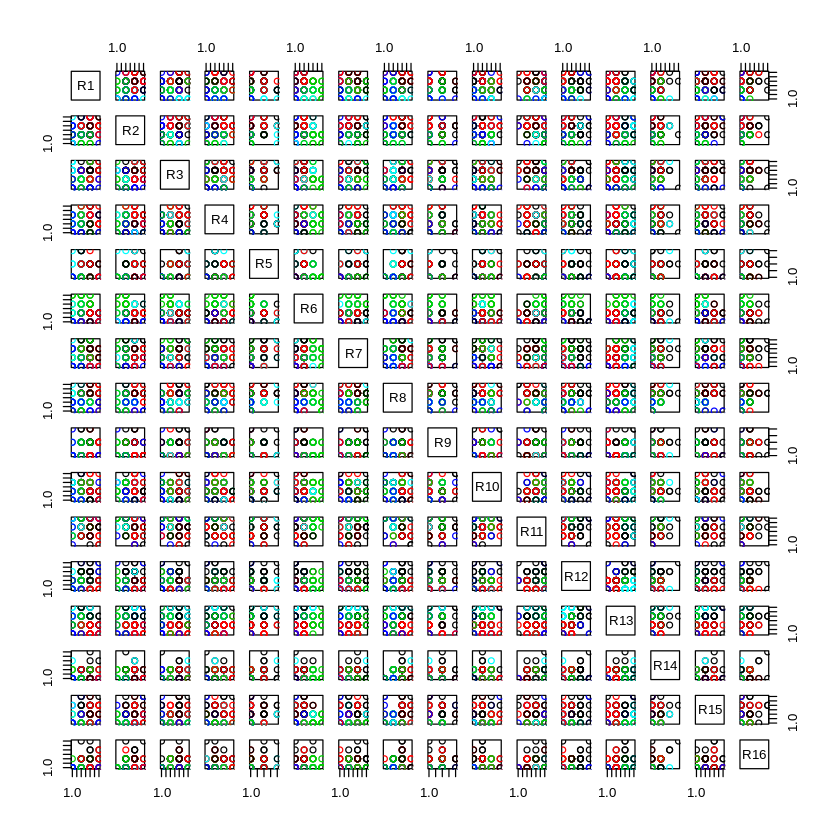

[1] 102.5415
[1] 3
[1] 79.72966
[1] 4
[1] 64.42166
[1] 5
[1] 53.28229
[1] 6
[1] 37.87782
[1] 7
[1] 37.0292
[1] 8
[1] 26.85897
[1] 9
[1] 30.41164
[1] 22.55785
[1] 11
[1] 27.09717
[1] 26.01017
[1] 18.97145
[1] 14
[1] 15.63713
[1] 15
[1] 22.9302
[1] 18.26265
[1] 13.94473
[1] 18
[1] 22.67601
[1] 13.90142
[1] 20
[1] 13.69348
[1] 21
[1] 17.93429
[1] 12.55842
[1] 23
[1] 18.55042
[1] 12.24881
[1] 25
[1] 11.90302
[1] 26
[1] 15.11038
[1] 12.53639
[1] 15.17532
[1] 7.721392
[1] 30
[1] 16.68753
[1] 10.70218
[1] 10.50714
[1] 13.4004
[1] 8.192857
[1] 14.17583
[1] 9.892027
[1] 14.32446
[1] 5.200541
[1] 39
[1] 7.509235
[1] 13.60703
[1] 13.4131
[1] 5.380952
[1] 10.17186


Warning message:
“did not converge in 1000 iterations”


[1] 1.739214
[1] 45


Warning message:
“did not converge in 1000 iterations”


[1] 17.54051


Warning message:
“did not converge in 1000 iterations”


[1] 4.006746
[1] 10.85317


Warning message:
“did not converge in 1000 iterations”


[1] 8.589899


Warning message:
“did not converge in 1000 iterations”


[1] 4.425974
[1] "mejor_k"
[1] 45


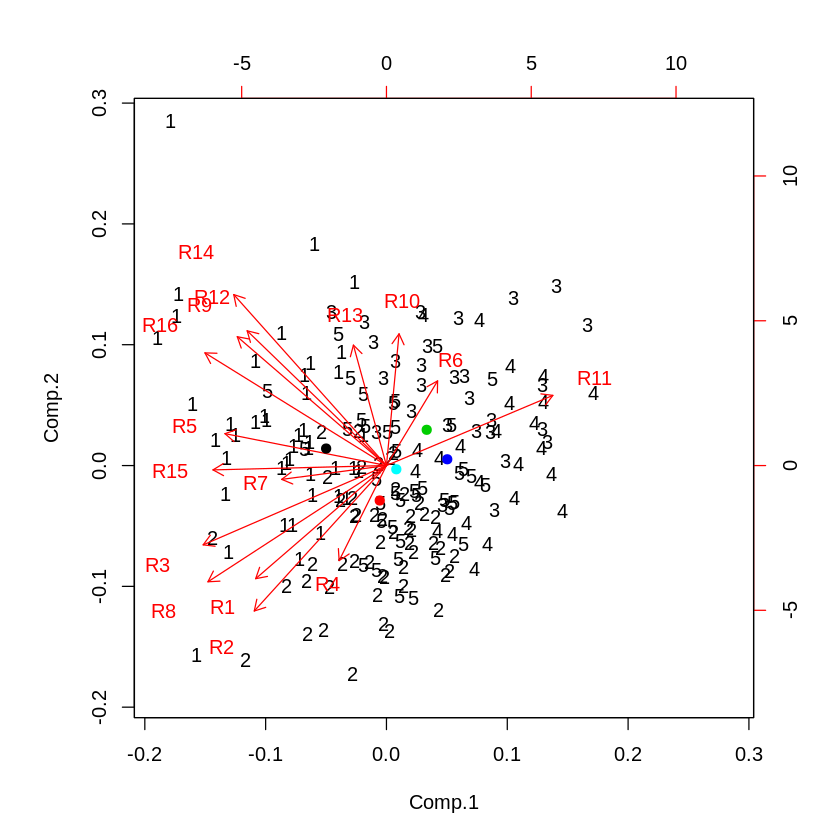

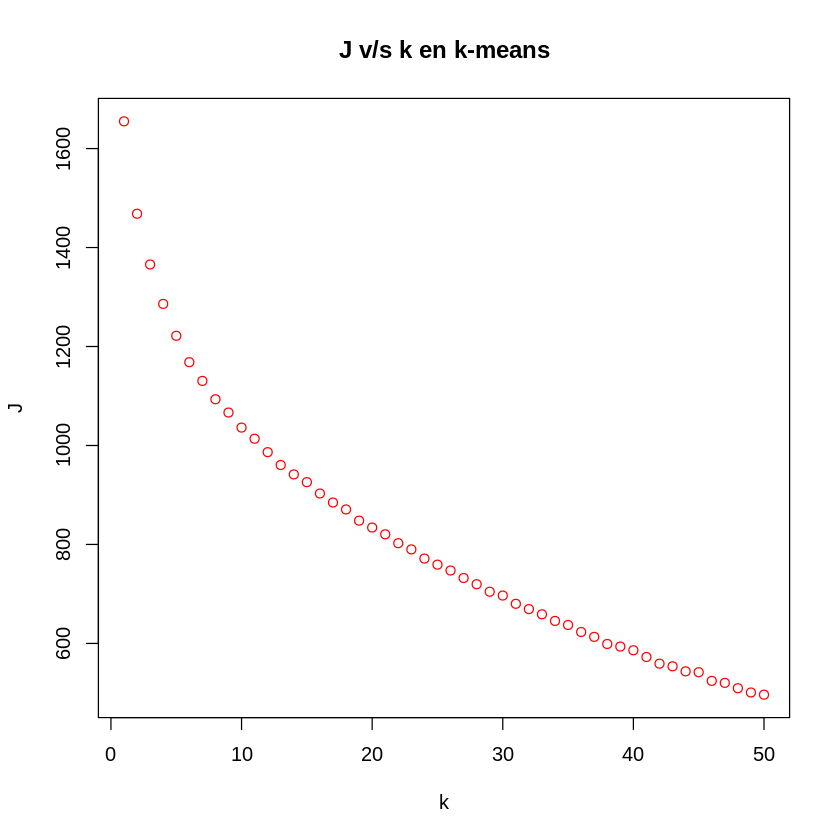

In [24]:

library(cluster)
library(ggplot2)

datos <-read.csv("DatosUsoFacebook.csv",header=TRUE,sep=";")

k0=5
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

J<-rep(0,50)
fin_iter<-50

p_min<-0
mejork<-0
continue<-1

for (k in 1:fin_iter){
    cl<-kmeans(datos,k,iter.max=1000,nstart=10)
    J[k]<-cl$tot.withinss
    if (k > 2 && continue == 1) {
        p<-J[k-1]-J[k]
        print(p)
        if(p < p_min ) {
            p_min<-p 
            mejork<-k
            print(k)
        }
    }else if(k == 2){
        p_min<-J[k-1]-J[k]
    }
}

print("mejor_k")
print(mejork)
plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2)

In [25]:
mejork

[1] 45

Existen elementos de 15 características, se agruparon en 5 clústers. Aunque  el análisis muestra que el mejor resultado es el de 45 grupos.Es complicado llegar a un analisis correcto por la cantidad de caracteristicas que se deben estudiar.
